In [1]:
#from bs4 import BeautifulSoup as bs
import requests
import datetime
import numpy as np
import pandas as pd
from time import ctime
import matplotlib.pyplot as plt

In [3]:
# 파일 저장 모듈

import pandas as pd
import datetime as dt
from pmaw import PushshiftAPI

class CsvSave:

    def __init__(self):
        pass
    
    def SelectSubreddit_comments(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(comments)} 개의 코멘트들이 출력됩니다.')
        
        comments_df = pd.DataFrame(comments)
        comments_df.to_csv('./wsb_comments_'+subreddit+'.csv', header=True, index=False, columns=list(comments_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_comments_'+subreddit+'.csv', encoding = 'utf8')
        return data['body']
        
        
    def SelectSubreddit_submissions(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        submissions = api.search_submissions(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(submissions)} 개의 게시글들이 출력됩니다.')
    
        submissions_df = pd.DataFrame(submissions)
        submissions_df.to_csv('./wsb_submissions_'+subreddit+'.csv', header=True, index=False, columns=list(submissions_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_submissions_'+subreddit+'.csv', encoding = 'utf8')
        return data['selftext']

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_comments()

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_submissions()

In [2]:
# 시계열 모듈화

import pandas as pd
from time import ctime
import datetime

class CsvOpener:
    
    # comment csv file의 형식은 'wsb_comments_찾고자하는 subreddit명.csv' 입니다.
    # submission csv file의 형식은 'wsb_submissions_찾고자하는 subreddit명.csv' 입니다.
    def __init__(self, file):
        self.file = file
        self.data = pd.read_csv(file, encoding = 'utf8')
        self.header = self.data.columns

    # 정수형의 unix time을 ctime을 통해 우리가 알아볼수 있게 변환
    def TimeConverter_comment(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week

                        
        return self.data[['body','time','time_month','time_week','score']]
   
    
    
    
    def TimeConverter_submission(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week
        
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]
    
    
    # 결측값을 'empty'로 수정하는 메서드 입니다.
    def FixMissingValue_submission(self):
        self.data['selftext'] = self.data['selftext'].fillna('empty')
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]


In [3]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [26]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

In [ ]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

In [28]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
Squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/3384557049.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

In [ ]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

In [ ]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

In [6]:
# 텍스트 마이닝 모듈 

import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 


class TextEditor():
    
    def __init__(self, file):
        self.file = file
        
    def textEditor(self):
        textlist = list(self.file[str(input('column명을 입력하세요'))].values)
        
        for text in textlist:
            if (text == '[removed]') or (text == '[deleted]') or ('I am a bot' in text):
                textlist.remove(text)

        # 문자열의 구두점을 삭제.
        punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
        titles_punctuation = [string.translate(punctuation) for string in textlist]
        
        titles_fixed = []
        special = re.compile(r'[^ A-Za-z0-9+]')
        for i in titles_punctuation:
            titles_fixed.append(special.sub('',i))
        
        
        titles_tokenized = []
        for titles_token in titles_fixed:
            element = titles_token.split(" ")
            for element_token in element:
                if element_token != '':
                    titles_tokenized.append(element_token.lower())
        
        stop_words = stopwords.words('english') # 불용어 로드
        titles_fixed_stopwords = [word for word in titles_tokenized if word not in stop_words] # 불용어 삭제
       
    
        title = []
        for titles in titles_fixed_stopwords:
            if len(titles) > 2:
                title.append(titles)
                
        result = []
        lemmatizer=WordNetLemmatizer()
        for word in title:
            result.append(lemmatizer.lemmatize(word))
        
        text_refined = []
        for i in result:
            text_tagged = pos_tag(word_tokenize(i))
            text_refined.append(text_tagged)
          
        text_refined2 = []
        for i in range(len(text_refined)):
            text_refined2.append(text_refined[i][0])
            
        return text_refined2

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
Squidgame_sub = TextEditor(Squidgame_sub)
text_refined = Squidgame_sub.textEditor()

column명을 입력하세요title


In [12]:
KDRAMA_sub = TextEditor(KDRAMA_sub)
text_refined = KDRAMA_sub.textEditor()

column명을 입력하세요title


In [ ]:
korea_sub = TextEditor(korea_sub)
text_refined = korea_sub.textEditor()

In [ ]:
koreanvariety_sub = TextEditor(koreanvariety_sub)
text_refined = koreanvariety_sub.textEditor()

In [100]:
Squidgame_co = TextEditor(Squidgame_co)
text_refined = Squidgame_co.textEditor()

column명을 입력하세요body


In [8]:
text_refined

[('standby', 'NN'),
 ('date', 'NN'),
 ('squidgame', 'NN'),
 ('release', 'NN'),
 ('rsquidgame', 'NN'),
 ('lounge', 'NN'),
 ('series', 'NN'),
 ('dub', 'NN'),
 ('good', 'JJ'),
 ('enough', 'RB'),
 ('worth', 'NN'),
 ('watching', 'VBG'),
 ('havent', 'NN'),
 ('seen', 'VBN'),
 ('sub', 'NN'),
 ('math', 'NN'),
 ('teacher', 'NN'),
 ('beat', 'NN'),
 ('215', 'CD'),
 ('odds', 'NNS'),
 ('math', 'NN'),
 ('teacher', 'NN'),
 ('beat', 'NN'),
 ('215', 'CD'),
 ('odds', 'NNS'),
 ('vip', 'NN'),
 ('thing', 'NN'),
 ('might', 'MD'),
 ('worked', 'VBN'),
 ('actingwriting', 'VBG'),
 ('good', 'JJ'),
 ('scene', 'NN'),
 ('saw', 'NN'),
 ('something', 'NN'),
 ('bizzare', 'NN'),
 ('hilarious', 'JJ'),
 ('interesting', 'VBG'),
 ('list', 'NN'),
 ('game', 'NN'),
 ('episode', 'NN'),
 ('spoiler', 'NN'),
 ('squid', 'NN'),
 ('game', 'NN'),
 ('country', 'NN'),
 ('based', 'VBN'),
 ('kid', 'NN'),
 ('game', 'NN'),
 ('game', 'NN'),
 ('would', 'MD'),
 ('play', 'NN'),
 ('would', 'MD'),
 ('work', 'NN'),
 ('cheating', 'VBG'),
 ('jumper'

# 워드클라우드

squidgame_sub, squidgame_co 만

In [9]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

NN_stopwords = ['squid', 'game', 'squidgame', 'spoiler', 'episode', 'dont', 'want', 'woudnt']
JJ_stopwords = ['english', 'ive', 'american', 'red', 'green']

def tag_wordcloud(element, tag):
    tag_list = []
    for i in element:
        if tag in i:
            tag_list.append(i[0])
    
    if tag == 'JJ':
        tag_list = [word for word in tag_list if word not in JJ_stopwords]
    elif tag == 'NN':
        tag_list = [word for word in tag_list if word not in NN_stopwords]

    count = Counter(tag_list)
    print(count)
    
    wc = WordCloud(font_path = 'malgun', background_color = 'white', width = 2000, height = 2000, scale = 2.0, max_font_size = 250)
    generate = wc.generate_from_frequencies(count)
    plt.figure(figsize=(18,18))
    plt.imshow(generate)
    wc.to_file(tag+'_squidgame.png')

Counter({'old': 288, 'real': 247, 'last': 227, 'new': 216, 'good': 195, 'much': 181, 'little': 148, 'many': 137, 'bad': 121, 'final': 107, 'second': 102, 'whole': 101, 'wrong': 93, 'different': 87, 'similar': 85, 'true': 85, 'possible': 85, 'happy': 83, 'next': 82, 'free': 77, 'original': 77, 'great': 77, 'main': 75, 'unpopular': 65, 'hard': 64, 'big': 61, 'popular': 60, 'short': 58, 'alive': 57, 'dead': 55, 'full': 54, 'entire': 52, 'live': 52, 'small': 46, 'hot': 45, 'ready': 43, 'familiar': 38, 'actual': 35, 'interested': 34, 'major': 34, 'black': 32, 'nice': 31, 'potential': 31, 'stupid': 30, 'local': 27, 'available': 26, 'low': 26, 'high': 26, 'terrible': 25, 'famous': 25, 'rich': 24, 'young': 24, 'underrated': 23, 'open': 21, 'easy': 21, 'social': 21, 'comic': 21, 'single': 20, 'asian': 19, 'poor': 19, 'important': 19, 'white': 19, 'hilarious': 18, 'special': 18, 'incredible': 18, 'able': 18, 'japanese': 18, 'huge': 18, 'personal': 18, 'complete': 18, 'certain': 18, 'due': 17, 'r

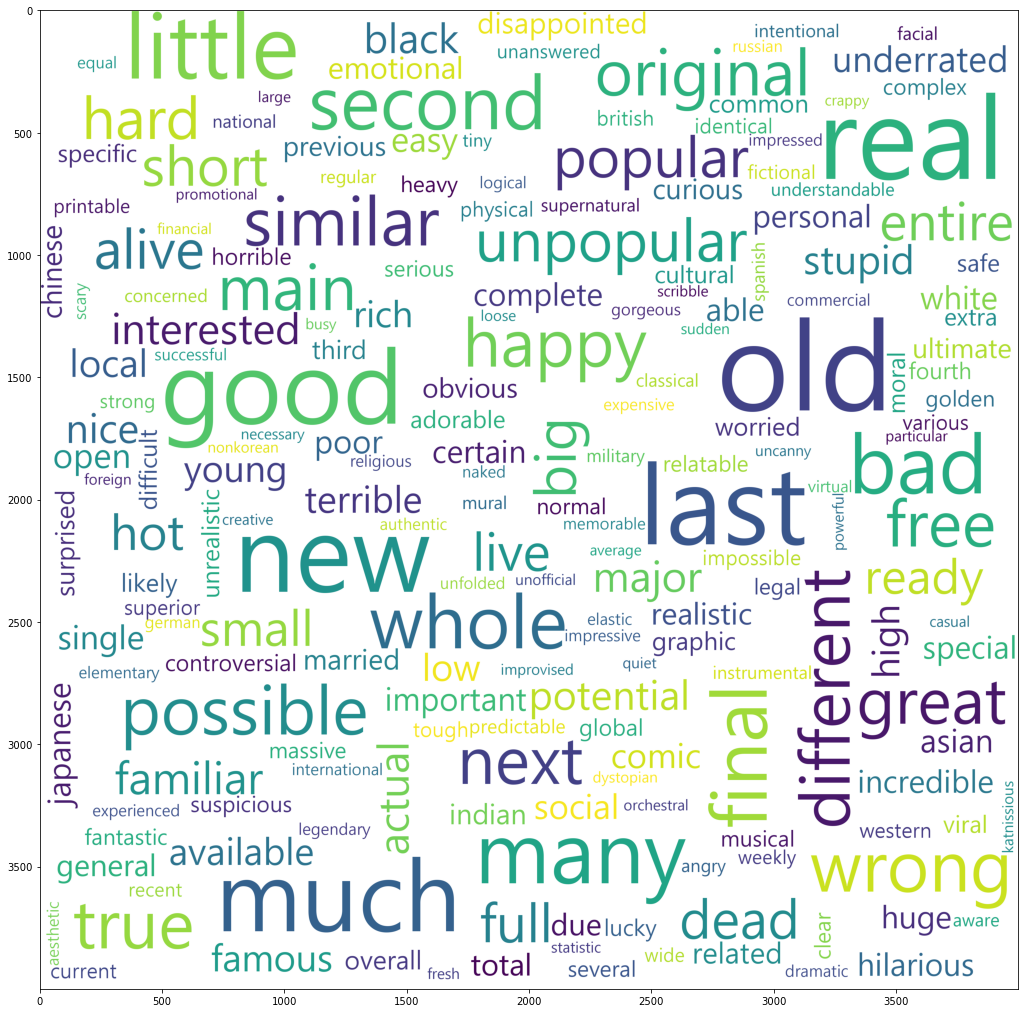

In [10]:
tag_wordcloud(text_refined, 'JJ')

# 그래프

각 subreddit sub, com 증감률

In [71]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [40]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [45]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [48]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [51]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1149917347.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [54]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/16459012.py:1: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [57]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3448111325.py:1: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  korea = CsvOpener('./wsb_comments_korea.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [60]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1994467615.py:1: DtypeWarning: Columns (3,41) have mixed types.Specify dtype option on import or set low_memory=False.
  koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [72]:
def graph(dataframe):
    sns.countplot(x=dataframe['time_week'], data=dataframe, order=[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9])
    plt.savefig(str(input("파일명"))+".png")

파일명Squidgame_sub


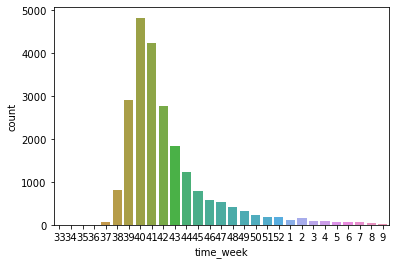

In [73]:
graph(Squidgame_sub)

In [13]:
Squidgame_sub

,title,selftext,time,time_month,time_week,score,num_comments
0,Standby for dates of when Squidgame will release.,If anyone wants to help with modding let me kn...,2021-08-18,2021-08,33,1,7
1,r/squidgame Lounge,A place for members of r/squidgame to chat wit...,2021-08-18,2021-08,33,1,0
2,What if?,"So, since you all saw, Gi Hun ended up picking...",2021-10-24,2021-10,42,1,3
3,:D,empty,2021-10-24,2021-10,42,1,28
4,Is the series dub good enough to be worth watc...,"What I mean is, is the dub of the series actua...",2021-10-24,2021-10,42,1,6
...,...,...,...,...,...,...,...
22669,But he went to SNU,empty,2021-10-11,2021-10,41,1,0
22670,Episode 6 Ggnabu is definitely the best episod...,empty,2021-10-11,2021-10,41,1,1
22671,not mine,empty,2021-10-11,2021-10,41,1,1
22672,"Hi, I made some fanart for Sae-byeok! Hope you...",empty,2021-10-11,2021-10,41,1,6


# 

Hwang Dong-hyuk

Lee Jung-jae as Seong Gi-hun (성기훈, 
Park Hae-soo as Cho Sang-woo (조상우,
Wi Ha-joon as Hwang Jun-ho (황준호,
HoYeon Jung as Kang Sae-byeok (강새벽,
O Yeong-su as Oh Il-nam (오일남,
Heo Sung-tae as Jang Deok-su (장덕수, 
Anupam Tripathi as Ali Abdul (알리 압둘,
Kim Joo-ryoung as Han Mi-nyeo (한미녀,

In [30]:
Squidgame_director = Squidgame_sub[Squidgame_sub['title'].str.contains('Dong-hyuk')]
Squidgame_director

,title,selftext,time,time_month,time_week,score,num_comments
2863,Hwang Dong-hyuk confirms season 2 | 🔺🔴🟥 | Squi...,empty,2021-11-10,2021-11,45,1,4
2890,Season 2 is Confirmed! Creator Hwang Dong-hyuk...,I just hope that original characters who are a...,2021-11-10,2021-11,45,1,2
3690,"Squid Game Director Hwang Dong-hyuk: ""It took ...",empty,2021-12-01,2021-12,48,1,14
4156,I think we might owe Daniel C Kennedy and Hwan...,empty,2021-11-17,2021-11,46,1,2
4200,Its official creator Hwang Dong-hyuk confirms ...,empty,2021-11-16,2021-11,46,1,1
4268,Hwang Dong-hyuk &amp; Brett Ratner,[removed],2021-11-15,2021-11,46,1,0
6218,Hwang Dong-hyuk (the writer-director of Squid ...,empty,2021-11-05,2021-11,44,1,2
6312,"‘Squid Game’ Season 2 Is Coming, Says Creator ...",empty,2021-11-10,2021-11,45,1,7
6335,Squid Game season 2 officially confirmed by Hw...,empty,2021-11-10,2021-11,45,1,1
6342,‘Squid Game’ Creator Hwang Dong-hyuk Confirms ...,empty,2021-11-09,2021-11,45,1,35


In [139]:
Squidgame_director = Squidgame_co[Squidgame_co['body'].str.contains('Jung-jae')]
Squidgame_director

,body,time,time_month,time_week,score
4845,"I follow Korean entertainment a bit, so when t...",2021-09-22,2021-09,38,11
5336,"Lee Byung-hun (Front Man), Gong Yoo (recruiter...",2021-10-03,2021-10,39,10
6299,I was watching some random Korean video called...,2021-10-14,2021-10,41,2
7111,We're very sorry. But we need to reveal the re...,2021-11-19,2021-11,46,1
10888,To everyone simping over Lee Jung-jae on this ...,2021-12-24,2021-12,51,1
12700,It's actual food. Lee Jung-jae commented on th...,2021-10-03,2021-10,39,2
16047,"Gong Yoo, Wi Ha-joon, Park Hae-soo, and Lee Ju...",2021-11-17,2021-11,46,1
19218,r/Squidgame AMA with Lee Jung-jae when?,2021-12-02,2021-12,48,13
21466,* **Outstanding Action Performance by a Stunt ...,2022-01-13,2022-01,2,1
30886,lol this is what I thought durning the first 5...,2021-11-16,2021-11,46,2


In [140]:
def graph(dataframe):
    sns.countplot(x=dataframe['time_week'], data=dataframe, order=[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9])

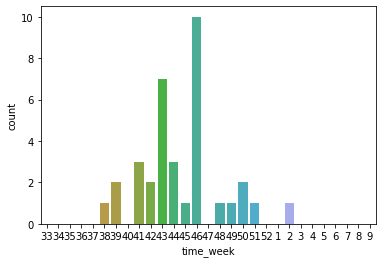

In [141]:
graph(Squidgame_director)